Missing Values:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
Pass                           0
dtype: int64


C:\Users\Aamit\AppData\Local\Temp\ipykernel_21792\1164129676.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pass", y="Hours_Studied", data=df, palette="coolwarm")
C:\Users\Aamit\AppData\Local\Temp\ipykernel_21792\1164129676.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pass", y="Attendance", data=df, palette="coolwarm")


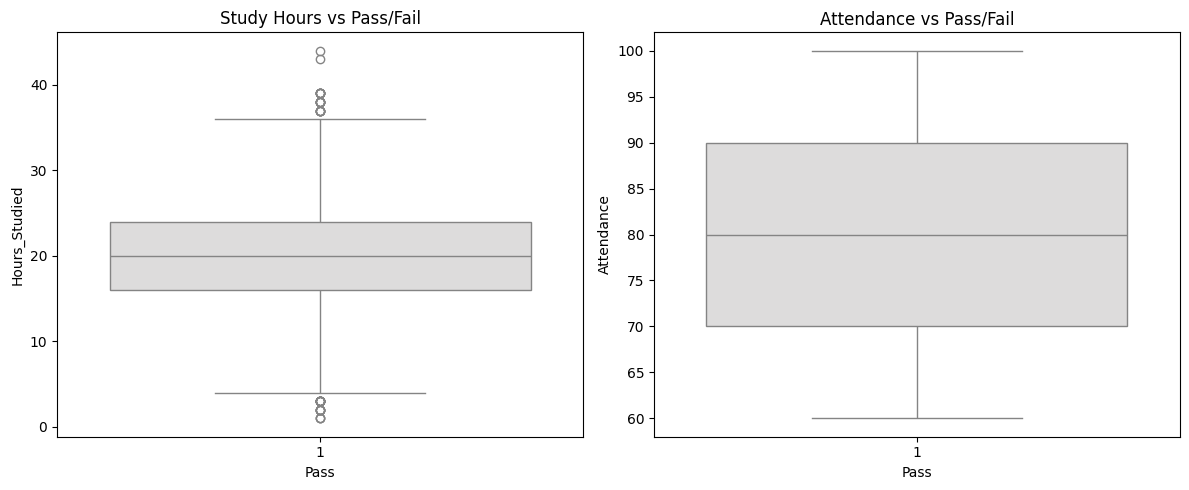

Pass/Fail Distribution Before Split:
 Pass
1    6607
Name: count, dtype: int64
Pass/Fail Distribution After Split:
 Pass
1    5285
Name: count, dtype: int64


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)

In [1]:
# 📌 Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📌 Step 1: Load the Dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

# 📌 Step 2: Convert 'Exam_Score' into Pass/Fail (1 = Pass, 0 = Fail)
df["Pass"] = (df["Exam_Score"] >= 50).astype(int)

# 📌 Step 3: Check Missing Values
print("Missing Values:\n", df.isnull().sum())

# 📌 Step 4: Data Visualization (Study Hours & Attendance vs Pass/Fail)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Pass", y="Hours_Studied", data=df, palette="coolwarm")
plt.title("Study Hours vs Pass/Fail")

plt.subplot(1, 2, 2)
sns.boxplot(x="Pass", y="Attendance", data=df, palette="coolwarm")
plt.title("Attendance vs Pass/Fail")

plt.tight_layout()
plt.show()

# 📌 Step 5: Features & Target Selection
X = df[["Hours_Studied", "Attendance"]]
y = df["Pass"]

# 📌 Step 6: Ensure Both Classes Exist Before Splitting
print("Pass/Fail Distribution Before Split:\n", y.value_counts())

# 📌 Step 7: Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 📌 Step 8: Ensure Both Classes Exist After Splitting
print("Pass/Fail Distribution After Split:\n", y_train.value_counts())

# 📌 Step 9: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 📌 Step 10: Predictions
y_pred = model.predict(X_test)

# 📌 Step 11: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("📊 Confusion Matrix:\n", conf_matrix)

print("📋 Classification Report:\n", classification_report(y_test, y_pred))

# 📌 Step 12: Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Fail (0)", "Pass (1)"], 
            yticklabels=["Fail (0)", "Pass (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
